In [51]:
import pandas as pd
import requests as r
import json
import time
import matplotlib.pyplot as plt
import re
import numpy as np

In [52]:
print('BIENVENUE')

data_w = pd.read_csv("2120116_V2.csv", sep =";")
data_v = pd.read_csv("vivino.csv", sep=",")

#check
#print(data_w.head())
#print(data.columns)
#print(data.shape)
#print(data.describe())
#print(data['NAME'].value_counts())

#print(data[data['NAME']=='REIMS PRUNAY, FR'].groupby('DATE').count())
#print(data.NAME.value_counts())

#df.DATE[(df.NAME=='REIMS PRUNAY, FR')]

dct_stations = {'bordeaux': 'BORDEAUX MERIGNAC, FR',
       'languedoc-roussillon':  'MONTPELLIER AEROPORT, FR',
       'cote-de-beaune': 'DIJON LONGVIC, FR',
       'cote-de-nuits': 'DIJON LONGVIC, FR' ,
       'rhone': 'LYON ST EXUPERY, FR',
       'loire-valley': 'NANTES BOUGUENAIS, FR',
       'bourgogne': 'DIJON LONGVIC, FR',
       'champagne': 'REIMS PRUNAY, FR',
       'alsace': 'STRASBOURG ENTZHEIM, FR',
       'chateauneuf-du-pape': 'MONTELIMAR, FR'}

### READ DF VIVINO

data_v['station']=data_v["vintage.wine.style.region.seo_name"].map(dct_stations)

#print(data_v.head())

#print(data_v.groupby('station').count())

def liste(c):
    N=[]
    for i in range(1,13):
        if i<10 :
            N.append(str(c)+str('-')+str(0)+str(i))
        else : 
            N.append(str(c)+str('-')+str(i))
    return N

def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column]
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

data_v['Year'] = data_v.apply(lambda row:(liste(row['vintage.year'])),axis=1)

data_v=splitDataFrameList(df=data_v, target_column="Year",separator=",")


BIENVENUE


In [53]:
#print(data_v.info())

data_v['join']=data_v.apply(lambda row:(str(row['station'])) +((str(row['Year']))),axis=1)
data_w['join']=data_w.apply(lambda row:(row['NAME'])+(row['DATE']),axis=1)
####### JOIN

#print(data_v['join'][0])
#print(data_w['join'][0])

#data_full = data_v.join(data_w, lsuffix='_caller', rsuffix='_other')

#data_full.to_csv("data_full_V1.csv", index = False)

data=data_v.merge(data_w,on='join')

print(data.info())

#result = pd.merge(data_v,  data_w,  on ='join_caller',  how ='inner') 

data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8149 entries, 0 to 8148
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          8149 non-null   int64  
 1   vintage.wine.winery.seo_name        8149 non-null   object 
 2   vintage.wine.winery.name            8149 non-null   object 
 3   vintage.wine.name                   8149 non-null   object 
 4   vintage.year                        8149 non-null   object 
 5   vintage.statistics.ratings_average  8149 non-null   float64
 6   vintage.wine.region.name            8149 non-null   object 
 7   vintage.wine.region.seo_name        8149 non-null   object 
 8   vintage.wine.style.region.seo_name  8149 non-null   object 
 9   station                             8149 non-null   object 
 10  Year                                8149 non-null   object 
 11  join                                8149 no

,Unnamed: 0,vintage.wine.winery.seo_name,vintage.wine.winery.name,vintage.wine.name,vintage.year,vintage.statistics.ratings_average,vintage.wine.region.name,vintage.wine.region.seo_name,vintage.wine.style.region.seo_name,station,...,join,STATION,NAME,DATE,CLDD,HTDD,PRCP,TAVG,TMAX,TMIN
0,0,chateau-batailley,Château Batailley,Pauillac (Grand Cru Classé),2013,4.1,Pauillac,pauillac,bordeaux,"BORDEAUX MERIGNAC, FR",...,"BORDEAUX MERIGNAC, FR2013-01",FR000007510,"BORDEAUX MERIGNAC, FR",2013-01,0.0,339.1,138.0,6.7,9.6,3.8
1,8,chateau-de-chantegrive,Château de Chantegrive,Graves,2013,3.7,Graves,graves,bordeaux,"BORDEAUX MERIGNAC, FR",...,"BORDEAUX MERIGNAC, FR2013-01",FR000007510,"BORDEAUX MERIGNAC, FR",2013-01,0.0,339.1,138.0,6.7,9.6,3.8
2,0,pontac-lynch,Château Pontac Lynch,Margaux,2013,4.1,Margaux,margaux,bordeaux,"BORDEAUX MERIGNAC, FR",...,"BORDEAUX MERIGNAC, FR2013-01",FR000007510,"BORDEAUX MERIGNAC, FR",2013-01,0.0,339.1,138.0,6.7,9.6,3.8
3,10,chateau-trotte-vieille,Château Trotte Vieille,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,2013,3.7,Saint-Émilion Grand Cru,st-emilion-grand-cru,bordeaux,"BORDEAUX MERIGNAC, FR",...,"BORDEAUX MERIGNAC, FR2013-01",FR000007510,"BORDEAUX MERIGNAC, FR",2013-01,0.0,339.1,138.0,6.7,9.6,3.8
4,18,chateau-lynch-moussas,Château Lynch-Moussas,Pauillac (Grand Cru Classé),2013,3.9,Pauillac,pauillac,bordeaux,"BORDEAUX MERIGNAC, FR",...,"BORDEAUX MERIGNAC, FR2013-01",FR000007510,"BORDEAUX MERIGNAC, FR",2013-01,0.0,339.1,138.0,6.7,9.6,3.8


In [54]:
data_v.isna().sum()
data_w.isna().sum()

STATION    428
NAME       428
DATE       428
CLDD       441
HTDD       441
PRCP       428
TAVG       428
TMAX       428
TMIN       428
join       428
dtype: int64

In [55]:
data_v["vintage.year"]=data_v["vintage.year"].replace("N.V.",0)

In [56]:
data_v["vintage.year"]=data_v.astype({"vintage.year":"int"}).dtypes

In [57]:
data_v[data_v["vintage.year"]<1998]

,Unnamed: 0,vintage.wine.winery.seo_name,vintage.wine.winery.name,vintage.wine.name,vintage.year,vintage.statistics.ratings_average,vintage.wine.region.name,vintage.wine.region.seo_name,vintage.wine.style.region.seo_name,station,Year,join


In [58]:
data_v["vintage.year"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
11995    NaN
11996    NaN
11997    NaN
11998    NaN
11999    NaN
Name: vintage.year, Length: 12000, dtype: object

In [59]:
data.shape

(8149, 21)

In [60]:
data.columns

Index(['Unnamed: 0', 'vintage.wine.winery.seo_name',
       'vintage.wine.winery.name', 'vintage.wine.name', 'vintage.year',
       'vintage.statistics.ratings_average', 'vintage.wine.region.name',
       'vintage.wine.region.seo_name', 'vintage.wine.style.region.seo_name',
       'station', 'Year', 'join', 'STATION', 'NAME', 'DATE', 'CLDD', 'HTDD',
       'PRCP', 'TAVG', 'TMAX', 'TMIN'],
      dtype='object')

In [61]:
#Cleaning column
data = data[['vintage.wine.winery.name', 'vintage.wine.name', 'vintage.year',
       'vintage.statistics.ratings_average', 'vintage.wine.region.name',
           'Year','NAME','DATE', 'CLDD', 'HTDD','PRCP', 'TAVG', 'TMAX','TMIN']]

In [64]:
data.NAME.unique()
data['vintage.wine.winery.name'].unique()
bdx=data[data.NAME=='BORDEAUX MERIGNAC, FR']
cdn=data[(data.NAME=='DIJON LONGVIC, FR') & (data['vintage.wine.winery.name']=='cote-de-beaune')]
cdb=data[(data.NAME=='DIJON LONGVIC, FR') & (data['vintage.wine.winery.name']=='cote-de-nuit')]
lr=data[data.NAME=='MONTPELLIER AEROPORT, FR']
rh=data[data.NAME=='LYON ST EXUPERY, FR']
lv=data[data.NAME=='NANTES BOUGUENAIS, FR']
chmp=data[data.NAME=='REIMS PRUNAY, FR']
als=data[data.NAME=='STRASBOURG ENTZHEIM, FR']
cdp=data[data.NAME=='MONTELIMAR, FR']
brg=data[(data.NAME=='DIJON LONGVIC, FR') & (data['vintage.wine.winery.name']=='bourgogne')]

In [65]:
a=data.groupby("vintage.year")["vintage.statistics.ratings_average"].agg("mean")
b=data.groupby("vintage.year")["TAVG"].agg("mean")

In [66]:
b

vintage.year
1998    11.432143
1999    14.291667
2000    14.270000
2001    13.467857
2002    14.425000
2003    14.852083
2004    12.433333
2005    12.906944
2006    13.751389
2007    12.939744
2008    12.707778
2009    13.452957
2010    12.264368
2011    13.557963
2012    12.823697
2013    11.966813
2014    13.973185
2015    13.838158
2016    13.734747
2017    14.012215
Name: TAVG, dtype: float64

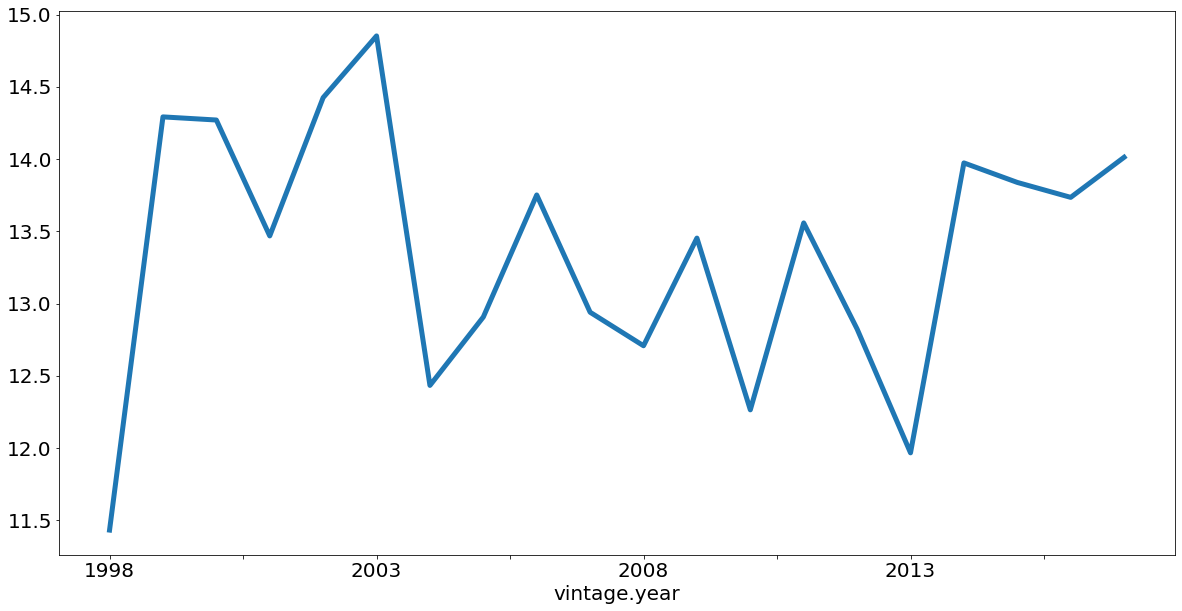

In [67]:
b.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('vintage.year', fontsize=20);

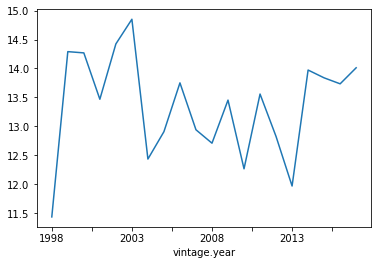

In [35]:
b.plot()

KeyError: 'vintage.year'

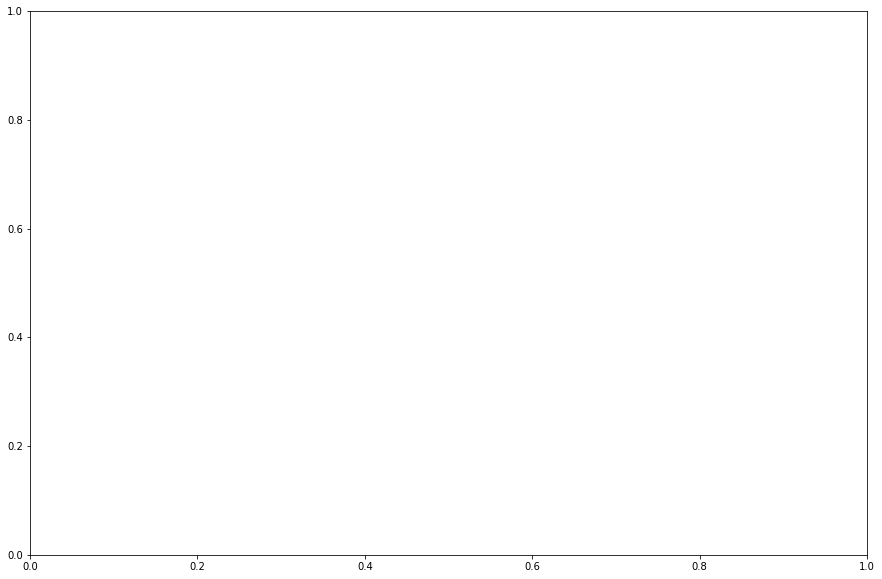

In [68]:
figure, axis_1 = plt.subplots(figsize=(15,10))

axis_1.plot(a["vintage.year"], a["vintage.statistics.ratings_average"], color=color)

axis_2 = axis_1.twinx()

axis_2.plot(b["vintage.year"], b["TAVG"])

In [ ]:
a

In [ ]:
b.shape

ValueError: x and y must have same first dimension, but have shapes (0,) and (20,)

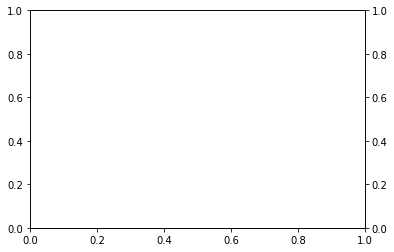

In [20]:
x = np.arange(1998, 1, 2020)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, a, 'g-')
ax2.plot(x, b, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()